In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from scipy.signal import convolve2d

sns.set(rc={'figure.figsize':(8,8)})
sns.set_style('white')

In [121]:
cd /content/drive/MyDrive/Giraffa Analytics/MRI-Blur-Detection

/content/drive/MyDrive/Giraffa Analytics/MRI-Blur-Detection


In [159]:
K = np.array([[1,0,-2],[1,0,-2],[1,0,-2]])

In [152]:
img_motion = np.load('Data/preprocessed slices/slice_100_NC227_motion.npy')
img_nomotion = np.load('Data/preprocessed slices/slice_100_NC227_nomotion.npy')

In [160]:
convolved_motion = convolve2d(img_motion, K, mode='same')
convolved_nomotion = convolve2d(img_nomotion, K, mode='same')

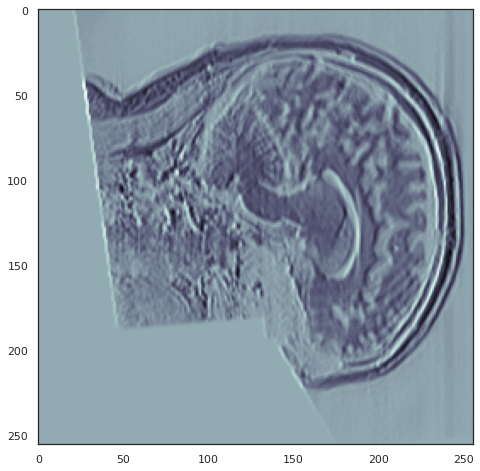

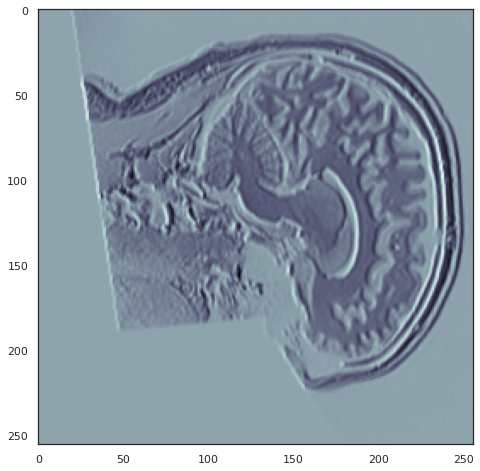

In [161]:
plt.imshow(convolved_motion, cmap='bone')
plt.figure()
plt.imshow(convolved_nomotion, cmap='bone')

In [162]:
std_motion = pd.Series(convolved_motion.reshape(convolved_motion.shape[0]*convolved_motion.shape[1])).describe()['std']

In [163]:
std_nomotion = pd.Series(img_motion.reshape(convolved_nomotion.shape[0]*convolved_nomotion.shape[1])).describe()['std']

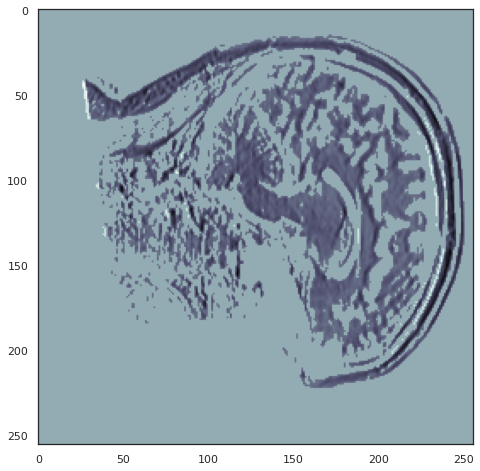

In [166]:
aux_motion = np.copy(convolved_motion)
for i in range(len(aux_motion)):
  for j in range(len(aux_motion[i])):
    if abs(aux_motion[i][j]) < std_motion*1.5:
      aux_motion[i][j] = 0
plt.imshow(aux_motion, cmap='bone')

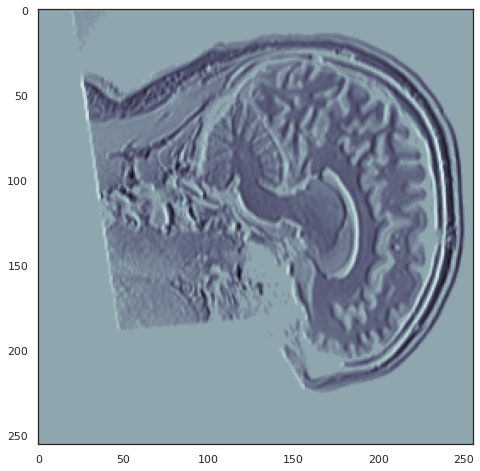

In [167]:
aux_nomotion = np.copy(convolved_nomotion)
for i in range(len(aux_nomotion)):
  for j in range(len(aux_nomotion[i])):
    if abs(aux_nomotion[i][j]) < std_nomotion*1.5:
      aux_nomotion[i][j] = 0
plt.imshow(aux_nomotion, cmap='bone')